(test-functions:ishigami)=
# Ishigami Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

The Ishigami test function is a three-dimensional scalar-valued function.
First introduced in {cite}`Ishigami1991` in the context of sensitivity analysis,
the function has been revisited many times in the same context
(see for instances {cite}`Sobol1999, Sudret2008, Marrel2009`).

## Test function instance

To create a default instance of the Ishigami test function:

In [2]:
my_testfun = uqtf.Ishigami()

Check if it has been correctly instantiated:

In [3]:
print(my_testfun)

Name              : Ishigami
Spatial dimension : 3
Description       : Ishigami function from Ishigami and Homma (1991)


## Description

The Ishigami function, a highly non-linear and non-monotonic function,
is given as follows:

$$
\mathcal{M}(\boldsymbol{x}) = \sin(x_1) + a \sin^2(x_2) + b \, x_3^4 \sin(x_1)
$$
where $\boldsymbol{x} = \{ x_1, x_2, x_3 \}$ is the three-dimensional vector of
input variables further defined below, and $a$ and $b$ are parameters
of the function.

## Probabilistic input

Based on {cite}`Ishigami1991`, the probabilistic input model for the Ishigami
function consists of three independent uniform random variables with the ranges
shown in the table below.

In [4]:
my_testfun.prob_input

ProbInput(spatial_dimension=3, marginals=(UnivDist(distribution='uniform', parameters=array([-3.14159265,  3.14159265]), name='X1', description='None'), UnivDist(distribution='uniform', parameters=array([-3.14159265,  3.14159265]), name='X2', description='None'), UnivDist(distribution='uniform', parameters=array([-3.14159265,  3.14159265]), name='X3', description='None')), copulas=None, name='Ishigami1991', description='Probabilistic input model for the Ishigami function from Ishigami and Homma (1991).')

## Parameters

The parameters of the Ishigami function are two real-valued numbers.
Some of the available parameter values taken from the literature are shown in
the table below.

| No. |        Value         |         Keyword          |        Source        |
|:---:|:--------------------:|:------------------------:|:--------------------:|
|  1  | $a = 7$, $b = 0.1$   | `Ishigami1991` (default) | {cite}`Ishigami1991` |
|  2  | $a = 7$, $b = 0.05$  |       `Sobol1999`        |  {cite}`Sobol1999`   |

Alternatively, to create an instance of the Ishigami function with
different parameter values, type:

```python
my_testfun = uqtf.Ishigami(parameters_selection="Sobol1999")
```

````{note}
To use another set of parameters, create a default test function
and pass one of the available keywords
(as indicated in the table above) to the `parameters_selection` parameter.
For example:
```python
my_testfun = uqtf.Ishigami(parameters_selection="Sobol1999")
```
````

## Reference results

This section provides several reference results of typical UQ analyses involving
the test function.

### Sample histogram

Shown below is the histogram of the output based on $100'000$ random points:

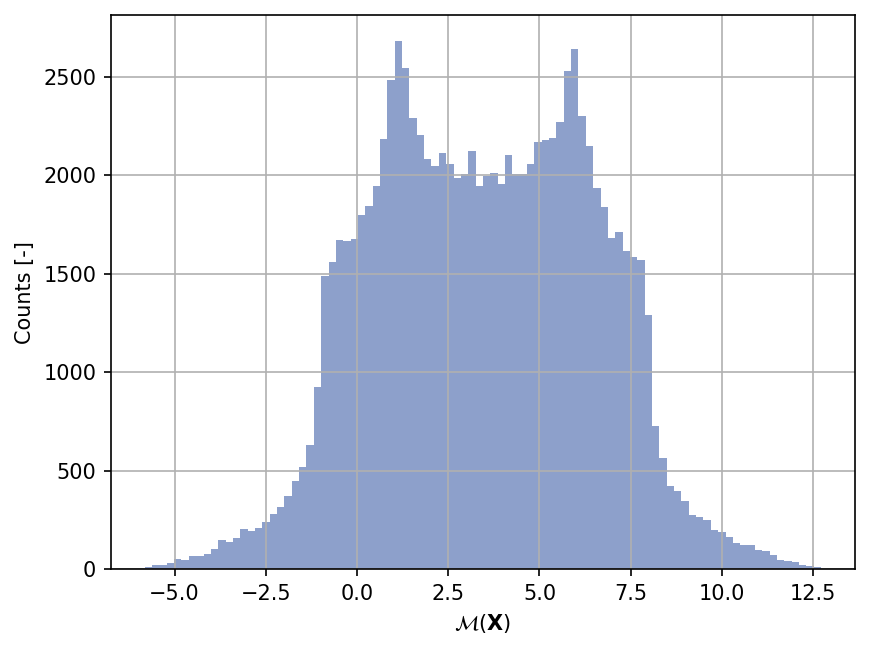

In [5]:
np.random.seed(42)
xx_test = my_testfun.prob_input.get_sample(100000)
yy_test = my_testfun(xx_test)

plt.hist(yy_test, bins="auto", color="#8da0cb");
plt.grid();
plt.ylabel("Counts [-]");
plt.xlabel("$\mathcal{M}(\mathbf{X})$");
plt.gcf().set_dpi(150);

### Moment estimations

The mean and variance of the Ishigami function can be computed analytically,  
and the results are:
  
- $\mathbb{E}[Y] = \frac{a}{2}$  
- $\mathbb{V}[Y] = \frac{a^2}{8} + \frac{b \pi^4}{5} + \frac{b^2 \pi^8}{18} + \frac{1}{2}$

Notice that the values of these two moments depend on the choice
of the parameter values.

Shown below is the convergence of a direct Monte-Carlo estimation of
the output mean and variance with increasing sample sizes compared with the
analytical values.

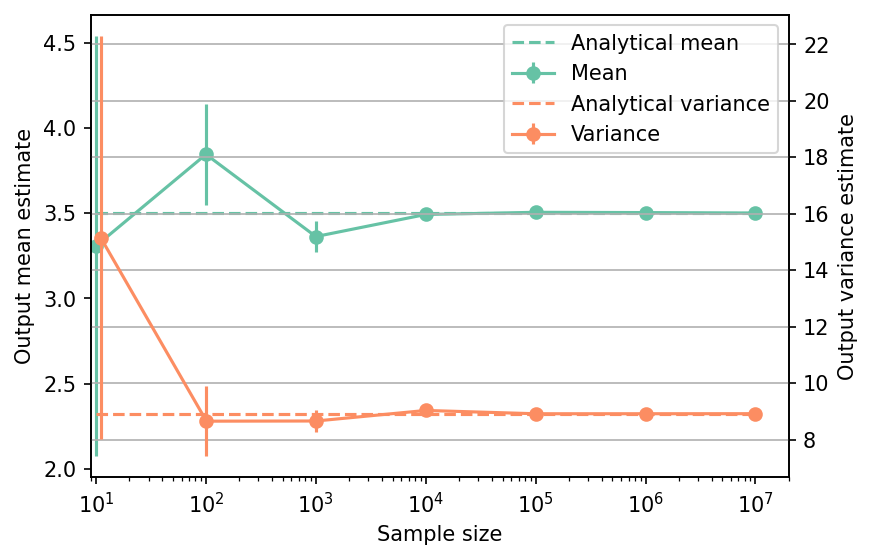

In [6]:
# --- Compute the mean and variance estimate
np.random.seed(42)
sample_sizes = np.array([1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7], dtype=int)
mean_estimates = np.empty(len(sample_sizes))
var_estimates = np.empty(len(sample_sizes))

for i, sample_size in enumerate(sample_sizes):
    xx_test = my_testfun.prob_input.get_sample(sample_size)
    yy_test = my_testfun(xx_test)
    mean_estimates[i] = np.mean(yy_test)
    var_estimates[i] = np.var(yy_test)

# --- Compute the error associated with the estimates
mean_estimates_errors = np.sqrt(var_estimates) / np.sqrt(np.array(sample_sizes))
var_estimates_errors = var_estimates * np.sqrt(2 / (np.array(sample_sizes) - 1))

fig, ax_1 = plt.subplots(figsize=(6,4))

# --- Mean plot
ax_1.errorbar(
    sample_sizes,
    mean_estimates,
    yerr=mean_estimates_errors,
    marker="o",
    color="#66c2a5",
    label="Mean"
)
# Plot the analytical mean
a = my_testfun.parameters[0]
mean_analytical = a / 2.0
ax_1.plot(
    sample_sizes,
    np.repeat(mean_analytical, len(sample_sizes)),
    linestyle="--",
    color="#66c2a5",
    label="Analytical mean",
)
ax_1.set_xlim([9, 2e7])
ax_1.set_xlabel("Sample size")
ax_1.set_ylabel("Output mean estimate")
ax_1.set_xscale("log");
ax_2 = ax_1.twinx()

# --- Variance plot
ax_2.errorbar(
    sample_sizes+1,
    var_estimates,
    yerr=var_estimates_errors,
    marker="o",
    color="#fc8d62",
    label="Variance",
)
# Plot the analytical variance
b = my_testfun.parameters[1]
var_analytical = a**2 / 8 + b * np.pi**4 / 5 + b**2 * np.pi**8 / 18 + 0.5
ax_2.plot(
    sample_sizes,
    np.repeat(var_analytical, len(sample_sizes)),
    linestyle="--",
    color="#fc8d62",
    label="Analytical variance",
)
ax_2.set_ylabel("Output variance estimate")

# Add the two plots together to have a common legend
ln_1, labels_1 = ax_1.get_legend_handles_labels()
ln_2, labels_2 = ax_2.get_legend_handles_labels()
ax_2.legend(ln_1 + ln_2, labels_1 + labels_2, loc=0)

plt.grid()
fig.set_dpi(150)

The tabulated results for each sample size is shown below.

In [7]:
from tabulate import tabulate

# --- Compile data row-wise
outputs = [
    [
        np.nan,
        mean_analytical,
        0.0,
        var_analytical,
        0.0,
        "Analytical",
    ]
]

for (
    sample_size,
    mean_estimate,
    mean_estimate_error,
    var_estimate,
    var_estimate_error,
) in zip(
    sample_sizes,
    mean_estimates,
    mean_estimates_errors,
    var_estimates,
    var_estimates_errors,
):
    outputs += [
        [
            sample_size,
            mean_estimate,
            mean_estimate_error,
            var_estimate,
            var_estimate_error,
            "Monte-Carlo",
        ],
    ]

header_names = [
    "Sample size",
    "Mean",
    "Mean error",
    "Variance",
    "Variance error",
    "Remark",
]

tabulate(
    outputs,
    headers=header_names,
    floatfmt=(".1e", ".4e", ".4e", ".4e", ".4e", "s"),
    tablefmt="html",
    stralign="center",
    numalign="center",
)

'<table>\n<thead>\n<tr><th style="text-align: center;"> Sample size </th><th style="text-align: center;">   Mean   </th><th style="text-align: center;"> Mean error </th><th style="text-align: center;"> Variance </th><th style="text-align: center;"> Variance error </th><th style="text-align: center;">  Remark   </th></tr>\n</thead>\n<tbody>\n<tr><td style="text-align: center;">     nan     </td><td style="text-align: center;">3.5000e+00</td><td style="text-align: center;"> 0.0000e+00 </td><td style="text-align: center;">8.9169e+00</td><td style="text-align: center;">   0.0000e+00   </td><td style="text-align: center;">Analytical </td></tr>\n<tr><td style="text-align: center;">   1.0e+01   </td><td style="text-align: center;">3.3079e+00</td><td style="text-align: center;"> 1.2312e+00 </td><td style="text-align: center;">1.5159e+01</td><td style="text-align: center;">   7.1458e+00   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+02   </td><td style="text-align: center;">3.8445e+00</td><td style="text-align: center;"> 2.9416e-01 </td><td style="text-align: center;">8.6529e+00</td><td style="text-align: center;">   1.2299e+00   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+03   </td><td style="text-align: center;">3.3626e+00</td><td style="text-align: center;"> 9.3054e-02 </td><td style="text-align: center;">8.6591e+00</td><td style="text-align: center;">   3.8744e-01   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+04   </td><td style="text-align: center;">3.4921e+00</td><td style="text-align: center;"> 3.0054e-02 </td><td style="text-align: center;">9.0327e+00</td><td style="text-align: center;">   1.2775e-01   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+05   </td><td style="text-align: center;">3.5048e+00</td><td style="text-align: center;"> 9.4424e-03 </td><td style="text-align: center;">8.9160e+00</td><td style="text-align: center;">   3.9874e-02   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+06   </td><td style="text-align: center;">3.5032e+00</td><td style="text-align: center;"> 2.9860e-03 </td><td style="text-align: center;">8.9164e+00</td><td style="text-align: center;">   1.2610e-02   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+07   </td><td style="text-align: center;">3.5007e+00</td><td style="text-align: center;"> 9.4437e-04 </td><td style="text-align: center;">8.9184e+00</td><td style="text-align: center;">   3.9884e-03   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n</tbody>\n</table>'

### Sensitivity indices

The main-effect and total-effect Sobol' indices of the Ishigami function can be   
derived analytically.  
  
The main-effect (i.e., first-order) Sobol' indices are:  
  
- $S_1 \equiv \frac{V_1}{\mathbb{V}[Y]}$
- $S_2 \equiv \frac{V_2}{\mathbb{V}[Y]}$
- $S_3 \equiv \frac{V_3}{\mathbb{V}[Y]}$
  
where the total variances $\mathbb{V}[Y]$ is given in the section above and  
the partial variances are given by:  
  
- $V_1 = \frac{1}{2} \, (1 + \frac{b \pi^4}{5})^2$  
- $V_2 = \frac{a^2}{8}$  
- $V_3 = 0$  
  
The total-effect Sobol' indices, on the other hand:  
  
- $ST_1 \equiv \frac{VT_1}{\mathbb{V}[Y]}$  
- $ST_2 \equiv \frac{VT_2}{\mathbb{V}[Y]}$  
- $ST_3 \equiv \frac{VT_3}{\mathbb{V}[Y]}$  
  
where:  
  
- $VT_1 = \frac{1}{2} \, (1 + \frac{b \pi^4}{5})^2 + \frac{8 b^2 \pi^8}{225}$  
- $VT_2 = \frac{a^2}{8}$  
- $VT_3 = \frac{8 b^2 \pi^8}{225}$  
  
Note, once more, that the values of the partial variances depend on
the parameter values.  
  
```{note}  
The Ishigami function has a peculiar dependence on $X_3$; the main-effect index
of the input variable is $0$ but the total-effect index is not, due to an
interaction with $X_1$!  
  
Furthermore, as can be seen from the function definition, $X_2$ has no
interaction effect; its main-effect and total-effect indices are exactly 
the same.  
```

## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```